In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Automated_Speed_Enforcement_Camera_Speed_Data.csv' 
df = pd.read_csv(file_path)

# Decided to ignore data before june 2023. basically remove any NA data
df = df[['Location', 'Camera_Install_Year', 'Latitude','Longitude', "Avg_Speed___2023_06_23", "F85th_____2023_06_23", "F_Compliance___2023_06_23", "Avg_Speed___2023_07_23", "F85th_____2023_07_23", "F_Compliance___2023_07_23", "Avg_Speed___2023_08_23", "F85th_____2023_08_23", "F_Compliance___2023_08_23", "Avg_Speed___2023_09_23", "F85th_____2023_09_23", "F_Compliance___2023_09_23", "Avg_Speed___2023_10_23", "F85th_____2023_10_23", "F_Compliance___2023_10_23", "Avg_Speed___2023_11_23", "F85th_____2023_11_23"]]

        Date Avg_Speed F85th F_Compliance
0 2023-06-23        47    53           76
1 2023-07-23        48    53           73
2 2023-08-23        47    53           74
3 2023-09-23        46    52           78
4 2023-10-23        46    52           78
5 2023-11-23        46    52          NaN
                       Date  Avg_Speed  F85th  F_Compliance
count                     6        6.0    6.0           5.0
unique                    6        3.0    2.0           4.0
top     2023-06-23 00:00:00       46.0   53.0          78.0
freq                      1        3.0    3.0           2.0
first   2023-06-23 00:00:00        NaN    NaN           NaN
last    2023-11-23 00:00:00        NaN    NaN           NaN
              Avg_Speed  F_Compliance
Avg_Speed      1.000000     -0.943456
F_Compliance  -0.943456      1.000000


C:\Users\Jason\AppData\Local\Temp\ipykernel_21784\2565353083.py:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  basic_stats = new_df.describe()


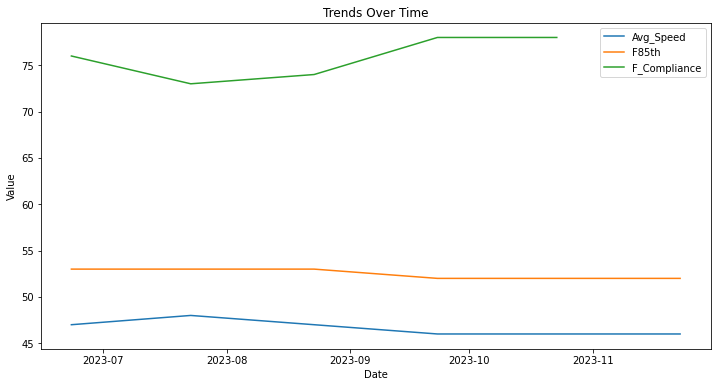

In [27]:
# analysis one location first
location_data = df.iloc[5]

# FIRST - DATA CLEANING

# remove non-date columns
date_entries = location_data[location_data.index.str.contains('2023')]

# Split index to get dates and metrics
dates = pd.to_datetime(date_entries.index.str.extract(r'___(2023_\d{2}_\d{2})')[0], format='%Y_%m_%d')
metrics = date_entries.index.str.extract(r'(^.*?)___')[0]

# create a new df from extracted data
new_df_data = {
    'Date': dates,
    'Metric': metrics,
    'Value': date_entries.values
}
temp_df = pd.DataFrame(new_df_data)

# Pivot to get the desired format
new_df = temp_df.pivot(index='Date', columns='Metric', values='Value').reset_index()
new_df.columns.name = None
new_df.rename(columns=lambda x: x.replace('F85th_____', 'F85th').replace('F_Compliance___', 'F_Compliance').replace('Avg_Speed___', 'Avg_Speed'), inplace=True)

# Display new df
print(new_df)

# SECOND - DATA ANALYSIS

# statistical analysis
basic_stats = new_df.describe()
print(basic_stats)

# correlation analysis
correlation = new_df[['Avg_Speed', 'F_Compliance']].astype(float).corr()
print(correlation)

# THIRD - DATA VISUALIZATION
plt.figure(figsize=(12, 6))
plt.plot(new_df['Date'], new_df['Avg_Speed'].astype(float), label='Avg_Speed')
plt.plot(new_df['Date'], new_df['F85th'].astype(float), label='F85th')
plt.plot(new_df['Date'], new_df['F_Compliance'].astype(float), label='F_Compliance')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trends Over Time')
plt.legend()
plt.show()